3D Propeller Blade Parametric Modeling
1. Camber Transformation of an Airfoil Profile

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Define NACA 4-digit symmetric thickness distribution (half-thickness y_t as function of x and max thickness t).
def naca4_thickness(x, t=0.12):
    # 5th-order polynomial fit for 4-digit NACA thickness (with ~0 trailing-edge thickness)
    return 5*t * (0.2969*np.sqrt(x) - 0.1260*x - 0.3516*x**2 + 0.2843*x**3 - 0.1015*x**4)

In [17]:
# Define NACA mean camber line (two parabolic segments defined by max camber m and position p).
def naca4_camber(x, m=0.0, p=0.4):
    # Piecewise mean-line equation (0 ≤ x ≤ p and p ≤ x ≤ 1)
    y_camber = np.where(x < p, 
                        m/(p**2) * (2*p*x - x**2), 
                        m/((1-p)**2) * ((1 - 2*p) + 2*p*x - x**2))
    return y_camber

In [18]:
# Airfoil parameters
c = 1.0                         # chord length
x = np.linspace(0, 1, 200)      # x as fraction of chord from 0 (LE) to 1 (TE)
t = 0.12                        # 12% thickness-to-chord
m_camber = 0.04;  p_camber = 0.4  # 4% camber, with max camber at 40% chord

In [19]:
# Symmetric foil (zero camber)
y_camber_sym = naca4_camber(x, m=0.0, p=p_camber)       # = 0 for all x
y_thickness = naca4_thickness(x, t=t)
y_upper_sym = y_camber_sym + y_thickness               # upper surface = camber + half-thickness
y_lower_sym = y_camber_sym - y_thickness               # lower surface = camber - half-thickness

In [20]:
# Cambered foil (nonzero mean-line)
y_camber = naca4_camber(x, m=m_camber, p=p_camber)
y_upper_cam = y_camber + y_thickness
y_lower_cam = y_camber - y_thickness

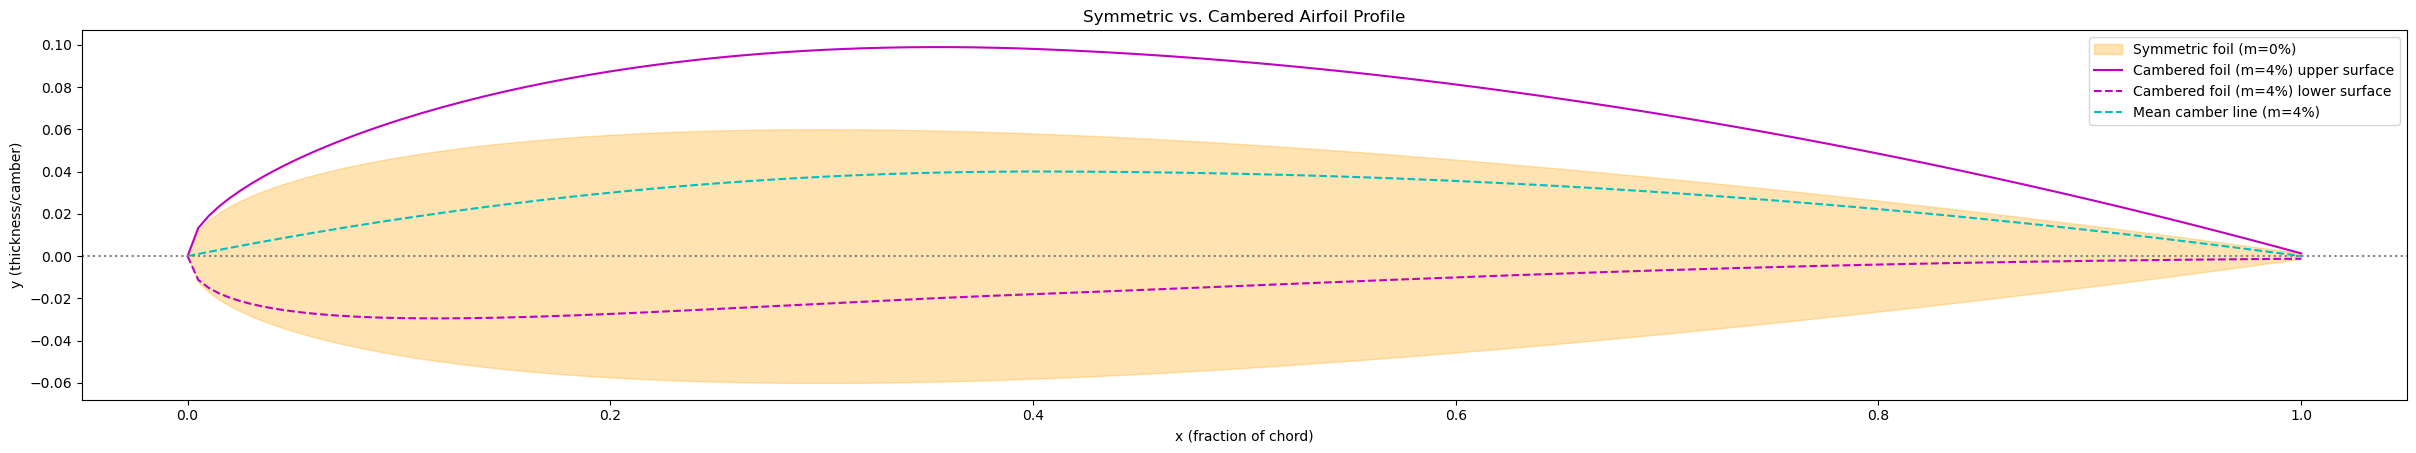

In [26]:
# Plot symmetric vs cambered profile
plt.figure(figsize=(30,20))
plt.fill_between(x, y_upper_sym, y_lower_sym, color='orange', alpha=0.3, label='Symmetric foil (m=0%)')
plt.plot(x, y_upper_cam, 'm', label='Cambered foil (m=4%) upper surface')
plt.plot(x, y_lower_cam, 'm--', label='Cambered foil (m=4%) lower surface')
plt.plot(x, y_camber, 'c--', label='Mean camber line (m=4%)')
plt.axhline(0, color='gray', linestyle=':')
plt.title("Symmetric vs. Cambered Airfoil Profile")
plt.xlabel("x (fraction of chord)")
plt.ylabel("y (thickness/camber)")
plt.legend(loc='upper right')
plt.gca().set_aspect('equal', 'box')
plt.show()